# Load Package

In [ ]:
import pandas as pd
import numpy as np
import sklearn.neural_network as ann
import sklearn.model_selection as ms
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive

drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Preprocessing

In [ ]:
df = pd.read_excel('/content/drive/Shareddrives/Analitika Data Project/data.xlsx')
df

,Age,gender,zon,mcklass,Vec-age,bonus,duration,nbclaim,Severity
0,0,M,1,4,12,1,0.175342,0,0
1,4,M,3,6,9,1,0.000000,0,0
2,5,K,3,3,18,1,0.454795,0,0
3,5,K,4,1,25,1,0.172603,0,0
4,6,K,2,1,26,1,0.180822,0,0
...,...,...,...,...,...,...,...,...,...
64543,86,M,4,5,16,3,0.413699,0,0
64544,86,M,4,6,9,7,1.057534,0,0
64545,87,M,4,6,10,7,0.323288,0,0
64546,91,M,1,5,17,1,0.000000,0,0


In [ ]:
df['frequency'] = round(df['nbclaim']/df['duration'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64548 entries, 0 to 64547
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        64548 non-null  int64  
 1   gender     64548 non-null  object 
 2   zon        64548 non-null  int64  
 3   mcklass    64548 non-null  int64  
 4   Vec-age    64548 non-null  int64  
 5   bonus      64548 non-null  int64  
 6   duration   64548 non-null  float64
 7   nbclaim    64548 non-null  int64  
 8   Severity   64548 non-null  int64  
 9   frequency  62478 non-null  float64
dtypes: float64(2), int64(7), object(1)
memory usage: 4.9+ MB


Mengecek adakah missing value dalam data

In [ ]:
df.isnull().sum()

Age             0
gender          0
zon             0
mcklass         0
Vec-age         0
bonus           0
duration        0
nbclaim         0
Severity        0
frequency    2070
dtype: int64

Melihat jumlah semua data

In [ ]:
df.sum()

Age                                                    2737872
gender       MMKKKKKMMMMKMKMMKMMMMMMMMMMKKMMMMMMMMMMMMMMKKK...
zon                                                     207400
mcklass                                                 238831
Vec-age                                                 809436
bonus                                                   259778
duration                                          65236.810827
nbclaim                                                    697
Severity                                              17041820
frequency                                                  inf
dtype: object

Melihat deskripsi dari data

In [ ]:
df.describe()

,Age,zon,mcklass,Vec-age,bonus,duration,nbclaim,Severity,frequency
count,64548.000000,64548.000000,64548.000000,64548.000000,64548.000000,64548.000000,64548.000000,64548.000000,62478.0
mean,42.416062,3.213113,3.700053,12.540063,4.024571,1.010671,0.010798,264.017785,inf
std,12.980960,1.354591,1.523921,9.727445,2.364742,1.307424,0.107323,4694.693604,NaN
min,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
25%,31.000000,2.000000,3.000000,5.000000,2.000000,0.463014,0.000000,0.000000,0.0
50%,44.000000,3.000000,4.000000,12.000000,4.000000,0.827397,0.000000,0.000000,0.0
75%,52.000000,4.000000,5.000000,16.000000,7.000000,1.000000,0.000000,0.000000,0.0
max,92.000000,7.000000,7.000000,99.000000,7.000000,31.339730,2.000000,365347.000000,inf


Cek, adakah data yang tidak valid

In [ ]:
jumlah_baris = len(df[(df['nbclaim'] == 0) & (df['Severity'] != 0)])
print(f"Jumlah baris dengan nbclaim=0 dan severity!=0 adalah {jumlah_baris}")

Jumlah baris dengan nbclaim=0 dan severity!=0 adalah 0


# Exploratory Data Analysis (EDA)

**EDA untuk variabel kategorik**

BARCHART VARIABEL ZON

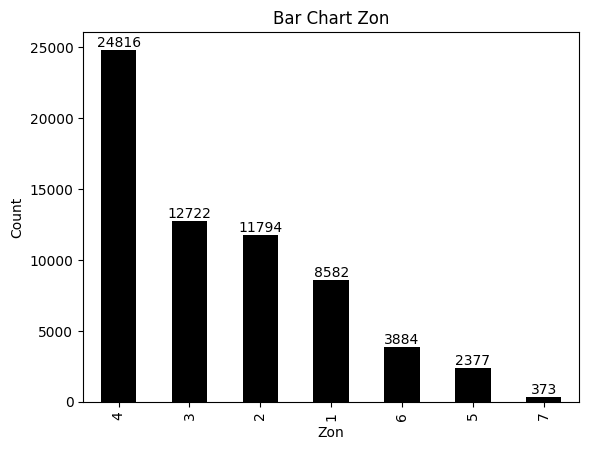

In [ ]:

count_zon = df['zon'].value_counts()

ax_zon=count_zon.plot(kind="bar", color="black")


# Add labels and title
plt.xlabel('Zon')
plt.ylabel('Count')
plt.title('Bar Chart Zon')

#Add number above above of the bar
for i, v in enumerate(count_zon):
    ax_zon.text(i, v + 0.1, str(v), ha='center', va='bottom')

# Display the chart
plt.show()


Terbanyak zon 4 sebanyak 24818, tersedikit zon 7 sebanyak 373

BARCHART VARIABEL MCKLASS

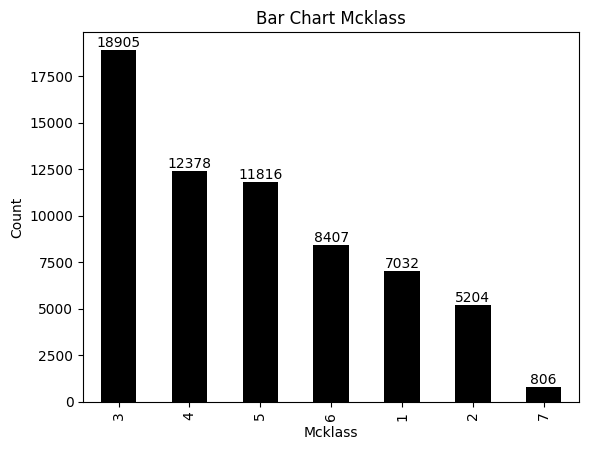

In [ ]:
count_mcklass = df['mcklass'].value_counts()

ax_mcklass=count_mcklass.plot(kind="bar", color="black")


# Add labels and title
plt.xlabel('Mcklass')
plt.ylabel('Count')
plt.title('Bar Chart Mcklass')

#Add number above above of the bar
for i, v in enumerate(count_mcklass):
    ax_mcklass.text(i, v + 0.1, str(v), ha='center', va='bottom')

# Display the chart
plt.show()

Terbanyak mcklass 3 sebanyak 18905, paling sedikit mcklass 7 sebanyak 806

BARCHART VARIABEL BONUS

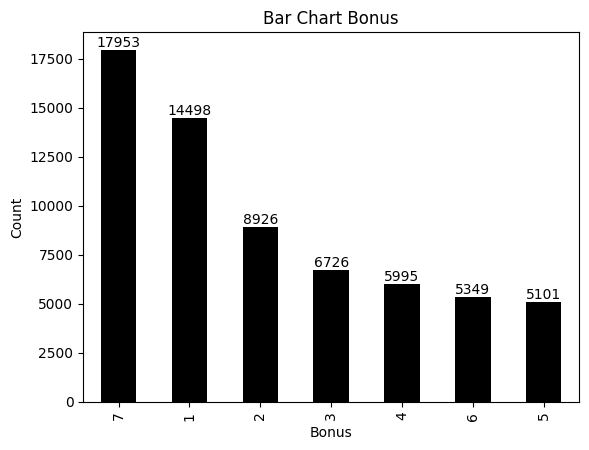

In [ ]:

count_bonus = df['bonus'].value_counts()

ax=count_bonus.plot(kind="bar", color="black")


# Add labels and title
plt.xlabel('Bonus')
plt.ylabel('Count')
plt.title('Bar Chart Bonus')

#Add number above above of the bar
for i, v in enumerate(count_bonus):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

# Display the chart
plt.show()


Dari barchart dapat terlihat bonus paling banyak adalah tingkat bonus 7 sejumlah 17953 dan paling sedikit adalah tingkat bonus 5 sejumlah 5101


**EDA untuk variabel kontinyu**

Histogram variabel Age

<BarContainer object of 85 artists>

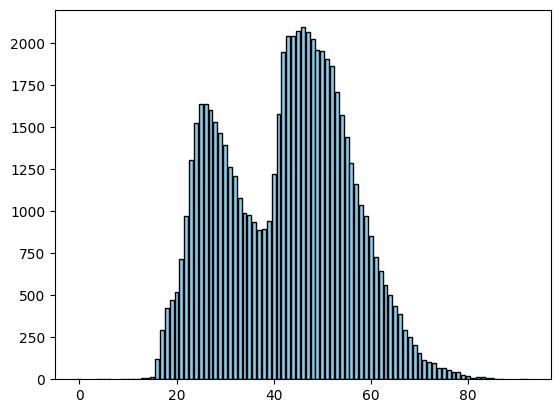

In [ ]:
count_Age = df['Age'].value_counts()
count_Age

#Sort by the age
df_Age = pd.DataFrame(count_Age)
df_Age_sorted = df_Age.sort_index()

#Creating the histogram
plt.bar(df_Age_sorted.index, df_Age_sorted.Age, color='skyblue', edgecolor='black')




Age tidak berdistribusi normal dilihat dari histogramnya yang memiliki 2 puncak sehingga dapat ditarik kesimpulan berdistribusi bimodal

HISTOGRAM VARIABEL VEC_AGE

<BarContainer object of 85 artists>

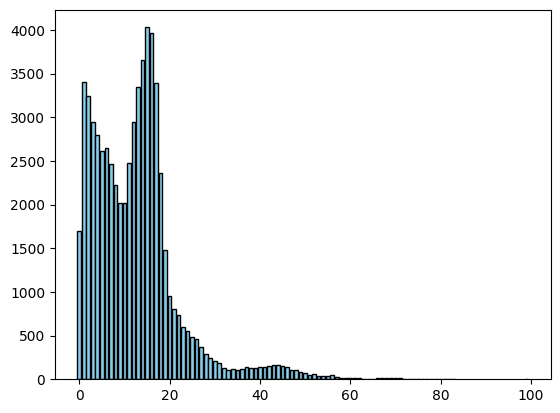

In [ ]:
count_Vec_age = df['Vec-age'].value_counts()
count_Vec_age

#Sort by the vec-age
df_Vec_age = pd.DataFrame(count_Vec_age)
df_Vec_age_sorted = df_Vec_age.sort_index()

#Creating the histogram
plt.bar(df_Vec_age_sorted.index, df_Vec_age_sorted['Vec-age'], color='skyblue', edgecolor='black')


Vec-age lebih tersebar di nilai yang rendah sehingga distribusinya miring ke kanan

# Artificial Neural Network (ANN) Model

Membentuk copy dari data yang akan digunakan untuk analisis lebih lanjut

In [ ]:
data = df

## Frequency Modeling
Frequency merupakan hasil bagi antara jumlah klaim dengan durasi. Pertama-tama, definisikan terlebih dahulu frequency

In [ ]:
data['frequency'] = round(data['nbclaim']/data['duration'])

###Frequency Visualization

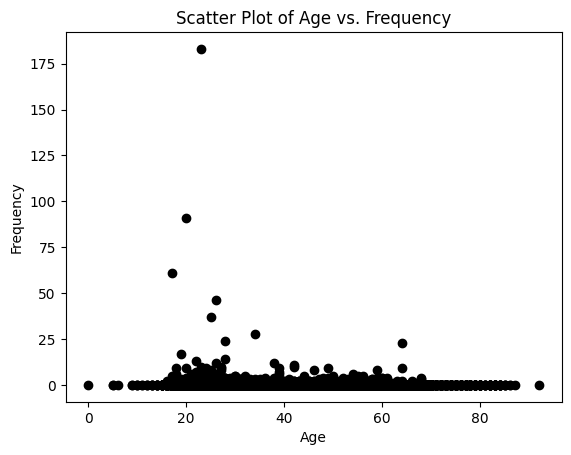

In [ ]:
#Age
plt.scatter(data['Age'], data['frequency'], color='black', marker='o')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Scatter Plot of Age vs. Frequency')

plt.show()

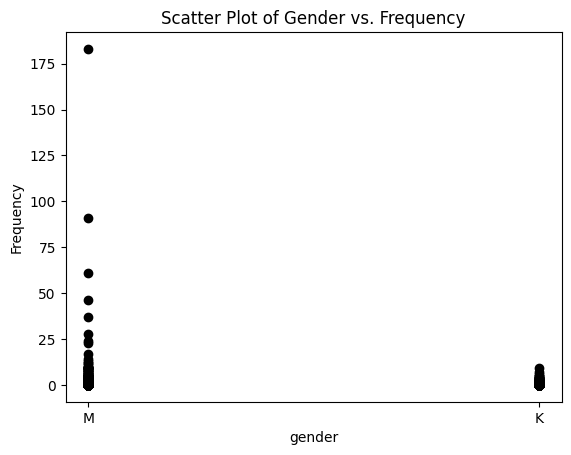

In [ ]:
#gender
plt.scatter(data['gender'], data['frequency'], color='black', marker='o')
plt.xlabel('gender')
plt.ylabel('Frequency')
plt.title('Scatter Plot of Gender vs. Frequency')

plt.show()

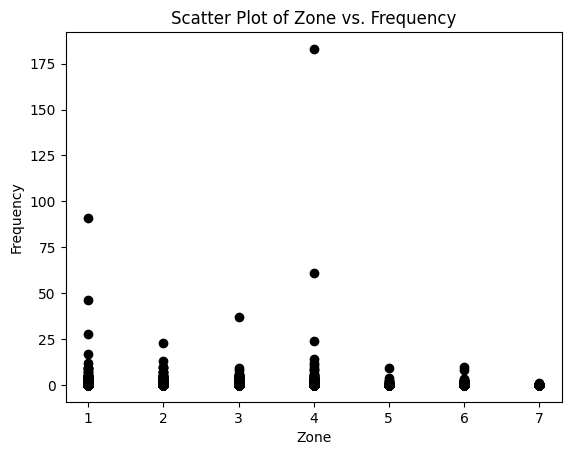

In [ ]:
#zon
plt.scatter(data['zon'], data['frequency'], color='black', marker='o')
plt.xlabel('Zone')
plt.ylabel('Frequency')
plt.title('Scatter Plot of Zone vs. Frequency')

plt.show()

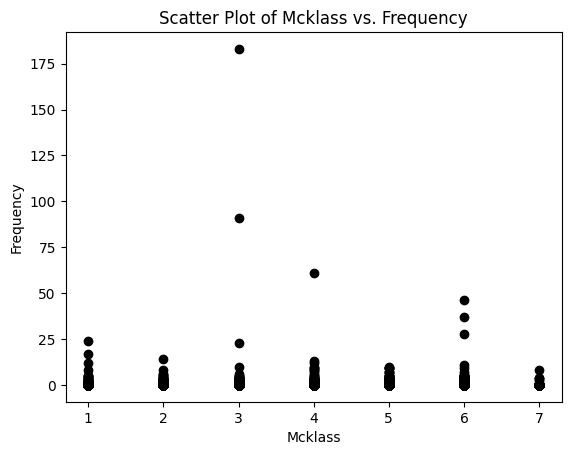

In [ ]:
#Mcklass
plt.scatter(data['mcklass'], data['frequency'], color='black', marker='o')
plt.xlabel('Mcklass')
plt.ylabel('Frequency')
plt.title('Scatter Plot of Mcklass vs. Frequency')

plt.show()

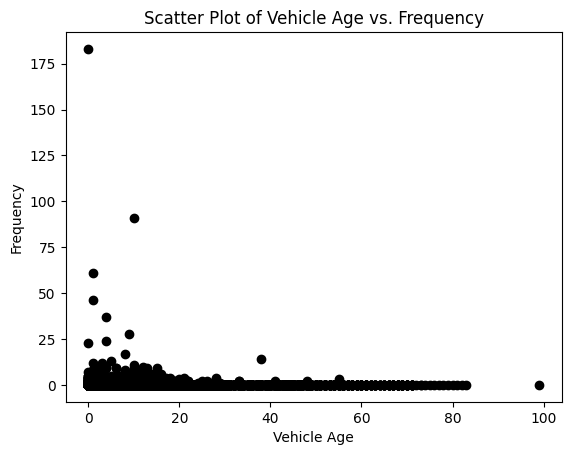

In [ ]:
#Vec-age
plt.scatter(data['Vec-age'], data['frequency'], color='black', marker='o')
plt.xlabel('Vehicle Age')
plt.ylabel('Frequency')
plt.title('Scatter Plot of Vehicle Age vs. Frequency')

plt.show()

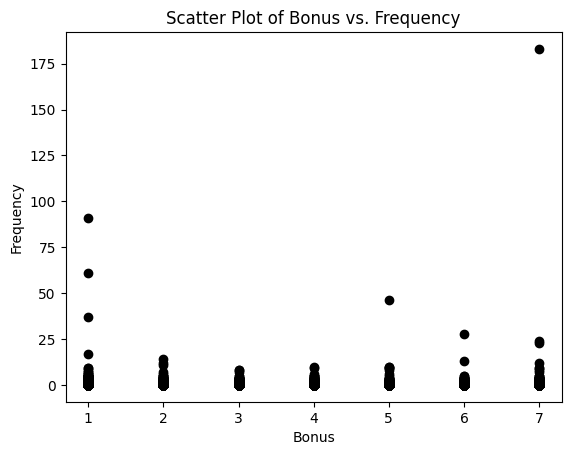

In [ ]:
#bonus
plt.scatter(data['bonus'], data['frequency'], color='black', marker='o')
plt.xlabel('Bonus')
plt.ylabel('Frequency')
plt.title('Scatter Plot of Bonus vs. Frequency')

plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64548 entries, 0 to 64547
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        64548 non-null  int64  
 1   gender     64548 non-null  object 
 2   zon        64548 non-null  int64  
 3   mcklass    64548 non-null  int64  
 4   Vec-age    64548 non-null  int64  
 5   bonus      64548 non-null  int64  
 6   duration   64548 non-null  float64
 7   nbclaim    64548 non-null  int64  
 8   Severity   64548 non-null  int64  
 9   frequency  62478 non-null  float64
dtypes: float64(2), int64(7), object(1)
memory usage: 4.9+ MB


Mengubah variabel kategorik gender menjadi dalam bentuk numerik (M: 0, K: 1) dan menetapkan nilai frequency '0' apabila jumlah klaim atau durasi bernilai 0 untuk mencegah error 'NaN'.

In [ ]:
data['gender'].replace(['M','K'],
                        [0, 1], inplace=True)
for i in range(len(data)):
  if ((data['nbclaim'])[i] == 0) or ((data['duration'])[i] == 0):
    (data['frequency'])[i] = 0

<ipython-input-252-f50b4c13ef1a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  (data['frequency'])[i] = 0


Melihat data hasil modifikasi

In [ ]:
data['frequency'] = data['frequency'].astype(int)

Mengubah type frequency sebagai integer, ini dilakukan karena apabila dalam bentuk float, akan menyebabkan error pada proses training dan testing yang memerlukan data dalam bentuk integer. Selain itu, ini juga meningkatkan keakuratan testing

In [ ]:
data['frequency']

0        0
1        0
2        0
3        0
4        0
        ..
64543    0
64544    0
64545    0
64546    0
64547    0
Name: frequency, Length: 64548, dtype: int64

In [ ]:
data.describe()

,Age,gender,zon,mcklass,Vec-age,bonus,duration,nbclaim,Severity,frequency
count,64548.000000,64548.000000,64548.000000,64548.000000,64548.000000,64548.000000,64548.000000,64548.000000,64548.000000,64548.000000
mean,42.416062,0.152646,3.213113,3.700053,12.540063,4.024571,1.010671,0.010798,264.017785,0.027003
std,12.980960,0.359649,1.354591,1.523921,9.727445,2.364742,1.307424,0.107323,4694.693604,0.931791
min,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,2.000000,3.000000,5.000000,2.000000,0.463014,0.000000,0.000000,0.000000
50%,44.000000,0.000000,3.000000,4.000000,12.000000,4.000000,0.827397,0.000000,0.000000,0.000000
75%,52.000000,0.000000,4.000000,5.000000,16.000000,7.000000,1.000000,0.000000,0.000000,0.000000
max,92.000000,1.000000,7.000000,7.000000,99.000000,7.000000,31.339730,2.000000,365347.000000,183.000000


Profiling singkat dari beberapa feature ini dan untuk mengetahui statistik penting beserta validasi data frequency

In [ ]:
X = data.drop(['duration', 'nbclaim', 'Severity'],axis=1)
y = data['frequency']

Kolom severity, nbclaim, dan duration tidak akan digunakan dalam proses training, sehingga akan dihilangkan, data tersebut diberikan label sebagai X dan data frequency diberikan label sebagai y

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64548 entries, 0 to 64547
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Age        64548 non-null  int64
 1   gender     64548 non-null  int64
 2   zon        64548 non-null  int64
 3   mcklass    64548 non-null  int64
 4   Vec-age    64548 non-null  int64
 5   bonus      64548 non-null  int64
 6   frequency  64548 non-null  int64
dtypes: int64(7)
memory usage: 3.4 MB


Melihat tipe data dari semua feature dan frequency

Selanjutnya, akan dilakukan normalisasi karena setiap feature memiliki jangkauan (min dan max) yang berbeda-beda. Proses normalisasi dilakukan agar jangkauan semua feature berada dalam kisaran yang sama\\

Dalam proses training, dataset akan dibagi menjadi 2: training dan test dataset. Pada kasus ini, akan dilakukan pembagian proporsi: \\
* 90:10
* 95:5
* 99:1


Pemilihan proporsi yang terbaik didasarkan dari model dengan MSE dan RMSE yang paling kecil

### a) 90% Training

In [ ]:
seed = 42
X_train, X_test, y_train, y_test = ms.train_test_split(X,y,test_size=0.1, random_state = seed)
X_train.count()

Age          58093
gender       58093
zon          58093
mcklass      58093
Vec-age      58093
bonus        58093
frequency    58093
dtype: int64

Terdapat 58093 data untuk 90% training

**Normalisasi**

Proses normalisasi ini bertujuan untuk mengubah jangkauan feature yang berbeda-beda menjadi suatu batasan yang lebih kecil. Misalkan seperti usia yang bisa mencapai 92 tahun dan nilai maksimum zone yang hanya bernilai 7.

In [ ]:
import sklearn.preprocessing as pp
scl = pp.StandardScaler(copy=True, with_mean=True, with_std=True)
scl.fit(X_train)
X_train=scl.transform(X_train)
X_test=scl.transform(X_test)

In [ ]:
print(X_train.min())
print(X_train.max())

-3.270869453122334
187.19607425920634


Tampak bahwa jangkauan sudah lumayan kecil

In [ ]:
#identity
mlpa = ann.MLPClassifier(hidden_layer_sizes=(1, ), max_iter=5, activation = 'identity', solver = "adam", random_state = seed)
mlpa.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='identity', hidden_layer_sizes=(1,), max_iter=5,
              random_state=42)

Fungsi aktivasi yang akan diujikan adalah identity saja karena output dari mlp_coefs merupakan bobot yang ekuivalen dengan koefisien beta dalam regresi, sehingga bisa langsung dibandingkan.

In [ ]:
ya_prediksi = mlpa.predict(X_test)

In [ ]:
import sklearn.metrics as met
print(met.classification_report(y_test,ya_prediksi))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6404
           1       0.00      0.00      0.00        19
           2       0.53      1.00      0.69        17
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1

    accuracy                           0.99      6455
   macro avg       0.17      0.22      0.19      6455
weighted avg       0.99      0.99      0.99      6455



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Tampak weighted average model tersebut sudah melebihi 90% yang artinya sudah cukup bagus, akan tetapi macro average masih sangat rendah, hal ini disebabkan dari terlalu banyak nilai '0' pada data, sehingga cenderung sedikit bias

In [ ]:
import math
import sklearn.metrics
msea = sklearn.metrics.mean_squared_error(y_test, ya_prediksi)
rmsea = math.sqrt(msea)
print(f"MSE menggunakan fungsi aktivasi identity dengan 90% training adalah {msea}")
print(f"RMSE menggunakan fungsi aktivasi identity dengan 90% training adalah {rmsea}")

MSE menggunakan fungsi aktivasi identity dengan 90% training adalah 0.03826491092176607
RMSE menggunakan fungsi aktivasi identity dengan 90% training adalah 0.19561418895817878


### b) 95% Training

In [ ]:
X1_train, X1_test, y1_train, y1_test = ms.train_test_split(X,y,test_size=0.05, random_state = seed)
X1_train.count()

Age          61320
gender       61320
zon          61320
mcklass      61320
Vec-age      61320
bonus        61320
frequency    61320
dtype: int64

Terdapat 61320 data untuk 95% training

**Normalisasi**

In [ ]:
scl = pp.StandardScaler(copy=True, with_mean=True, with_std=True)
scl.fit(X1_train)
X1_train=scl.transform(X1_train)
X1_test=scl.transform(X1_test)

In [ ]:
print(X1_train.min())
print(X1_train.max())

-3.269117448534325
191.82357463171556


Tampak jangkauan sudah lumayan kecil

In [ ]:
#Identity
mlpb = ann.MLPClassifier(hidden_layer_sizes=(1, ), max_iter=5, activation = "identity", solver = "adam", random_state = seed)
mlpb.fit(X1_train, y1_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='identity', hidden_layer_sizes=(1,), max_iter=5,
              random_state=42)

In [ ]:
yb_prediksi = mlpb.predict(X1_test)

In [ ]:
print(met.classification_report(y1_test,yb_prediksi))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3204
           1       0.00      0.00      0.00         9
           2       0.57      1.00      0.73         8
           3       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          61       0.00      0.00      0.00         0

    accuracy                           1.00      3228
   macro avg       0.20      0.25      0.22      3228
weighted avg       0.99      1.00      0.99      3228



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Tampak bahwa weighted average model sudah melebihi 90% yang artinya sudah bagus, akan tetapi macro average masih bernilai sangat kecil yang disebabkan dari jumlah nilai '0' yang sangat banyak dan tidak proporsional terhadap data

In [ ]:
mseb = sklearn.metrics.mean_squared_error(y1_test, yb_prediksi)
rmseb = math.sqrt(mseb)
print(f"MSE menggunakan fungsi aktivasi Identity dengan 95% training adalah {mseb}")
print(f"RMSE menggunakan fungsi aktivasi Identity dengan 95% training adalah {rmseb}")

MSE menggunakan fungsi aktivasi Identity dengan 95% training adalah 0.8203221809169765
RMSE menggunakan fungsi aktivasi Identity dengan 95% training adalah 0.9057163909949828


### c) 99% Training

In [ ]:
X2_train, X2_test, y2_train, y2_test = ms.train_test_split(X,y,test_size=0.01, random_state = seed)
X2_train.count()

Age          63902
gender       63902
zon          63902
mcklass      63902
Vec-age      63902
bonus        63902
frequency    63902
dtype: int64

Terdapat 63902 data pada 99% training

**Normalisasi**

In [ ]:
scl = pp.StandardScaler(copy=True, with_mean=True, with_std=True)
scl.fit(X2_train)
X2_train=scl.transform(X2_train)
X2_test=scl.transform(X2_test)

In [ ]:
print(X2_train.min())
print(X2_train.max())

-3.2679417500400083
195.63493850415796


Tampak bahwa jangkauan sudah lumayan kecil

In [ ]:
#Identity
mlpc = ann.MLPClassifier(hidden_layer_sizes=(1, ), max_iter=5, activation = 'identity', solver = "adam", random_state = seed)
mlpc.fit(X2_train, y2_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='identity', hidden_layer_sizes=(1,), max_iter=5,
              random_state=42)

In [ ]:
yc_prediksi = mlpc.predict(X2_test)

In [ ]:
print(met.classification_report(y2_test,yc_prediksi))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       636
           1       0.00      0.00      0.00         2
           2       0.50      1.00      0.67         4
           3       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         1

    accuracy                           0.99       646
   macro avg       0.30      0.40      0.33       646
weighted avg       0.98      0.99      0.99       646



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Seperti model-model sebelumnya, weighted average > 90% sehingga termasuk bagus, macro average masih termasuk rendah, akan tetapi menunjukkan perkembangan yang signifikan dibandingkan macro average pada model-model sebelumnya

In [ ]:
msec = sklearn.metrics.mean_squared_error(y2_test, yc_prediksi)
rmsec = math.sqrt(msec)
print(f"MSE menggunakan fungsi aktivasi Identity dengan 99% training adalah {msec}")
print(f"RMSE menggunakan fungsi aktivasi Identity dengan 99% training adalah {rmsec}")

MSE menggunakan fungsi aktivasi Identity dengan 99% training adalah 0.10681114551083591
RMSE menggunakan fungsi aktivasi Identity dengan 99% training adalah 0.32681974467714753


### Best Model Frequency

In [ ]:
Freq_Selection = {
    'Model': ['90%', '95%', '99%'],
    'MSE': [msea, mseb, msec],
    'RMSE': [rmsea, rmseb, rmsec]
}
pd.DataFrame(Freq_Selection)

,Model,MSE,RMSE
0,90%,0.038265,0.195614
1,95%,0.820322,0.905716
2,99%,0.106811,0.326820


Diperoleh Model 90% Training dengan fungsi aktivasi identity merupakan model terbaik berdasarkan MSE & RMSE terkecil

In [ ]:
print(mlpa.coefs_)

[array([[ 4.53872070e-03],
       [ 2.23687266e-03],
       [ 4.37262339e-03],
       [-9.41538651e-04],
       [ 3.90254454e-03],
       [-1.03708575e-03],
       [-1.37606773e+00]]), array([[ 1.20798921, -0.84385748, -1.31041376, -0.58376256, -0.74518909,
        -1.30629486, -1.30941307, -1.31204862, -1.27924816, -1.05923716,
        -1.15547694, -1.29101669, -0.9650855 , -1.23577662, -1.28808669,
        -1.21708302, -1.11109841, -0.77433324, -1.30447419, -1.04161362,
        -0.97549838, -1.28340443, -0.88377276, -1.10401436]])]


## Severity Modelling

In [ ]:
data2 = df

Mengcopy data dari dataframe awal untuk digunakan dalam pemodelan severity

In [ ]:
data2['Severity'] = round(data2['Severity'])

Sama seperti pada kasus frequency, nilai severity akan dilakukan pembulatan dan akan dibuat menjadi type integer agar melancarkan proses training & testing

In [ ]:
data2['gender'].replace(['M', 'K'],
                        [0, 1], inplace=True)

Mengubah data kategorik menjadi dalam bentuk numerik (M: 0, K: 1)

###Severity Visualization

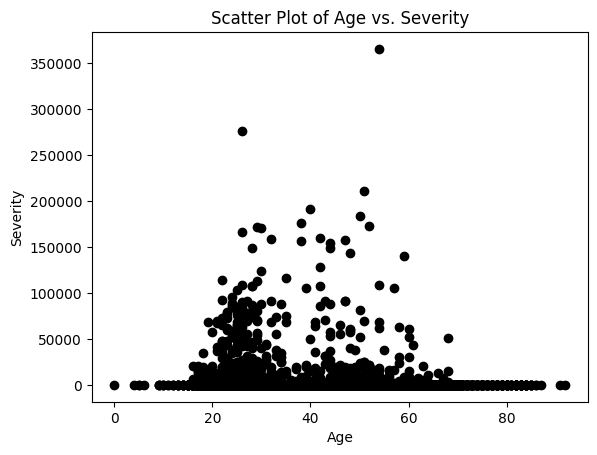

In [ ]:
#age
plt.scatter(data2['Age'], data2['Severity'], color='black', marker='o')
plt.xlabel('Age')
plt.ylabel('Severity')
plt.title('Scatter Plot of Age vs. Severity')

plt.show()

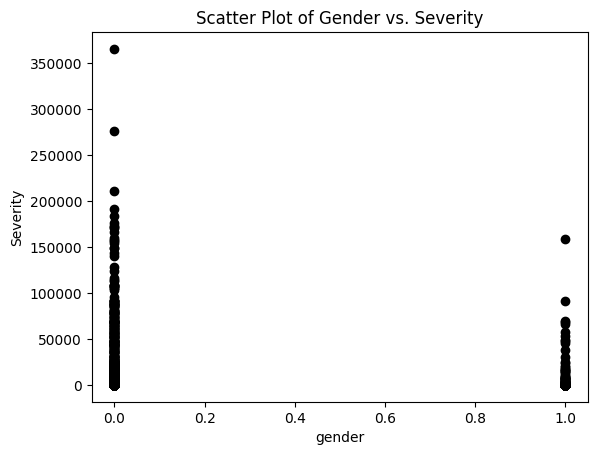

In [ ]:
#gender
plt.scatter(data2['gender'], data2['Severity'], color='black', marker='o')
plt.xlabel('gender')
plt.ylabel('Severity')
plt.title('Scatter Plot of Gender vs. Severity')

plt.show()

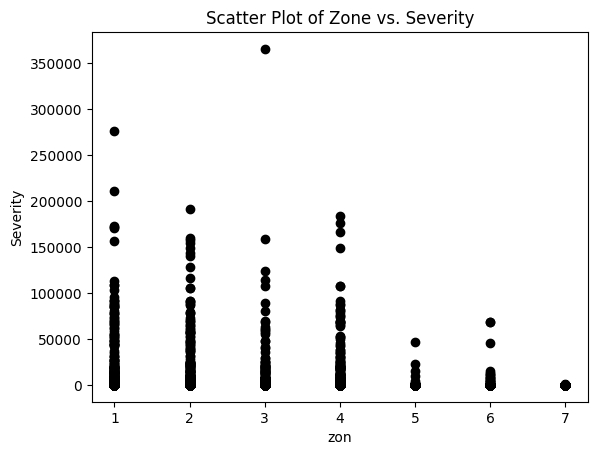

In [ ]:
#zone
plt.scatter(data2['zon'], data2['Severity'], color='black', marker='o')
plt.xlabel('zon')
plt.ylabel('Severity')
plt.title('Scatter Plot of Zone vs. Severity')

plt.show()

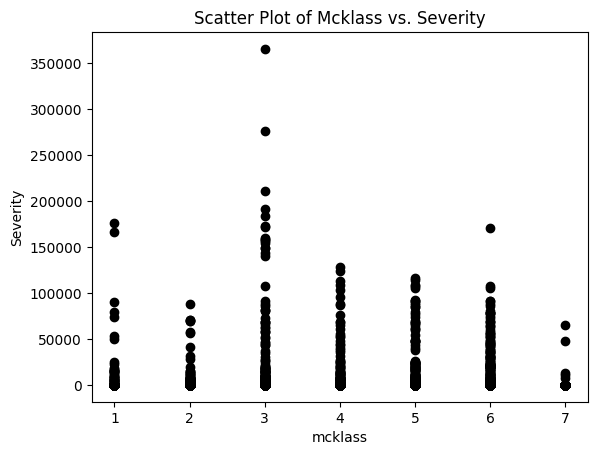

In [ ]:
#mcklass
plt.scatter(data2['mcklass'], data2['Severity'], color='black', marker='o')
plt.xlabel('mcklass')
plt.ylabel('Severity')
plt.title('Scatter Plot of Mcklass vs. Severity')

plt.show()

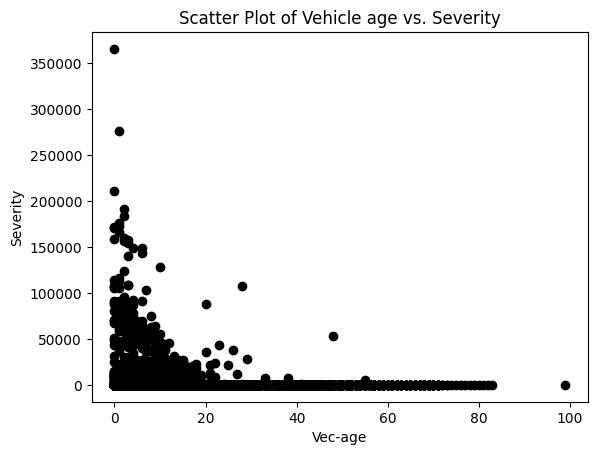

In [ ]:
#vec-age
plt.scatter(data2['Vec-age'], data2['Severity'], color='black', marker='o')
plt.xlabel('Vec-age')
plt.ylabel('Severity')
plt.title('Scatter Plot of Vehicle age vs. Severity')

plt.show()

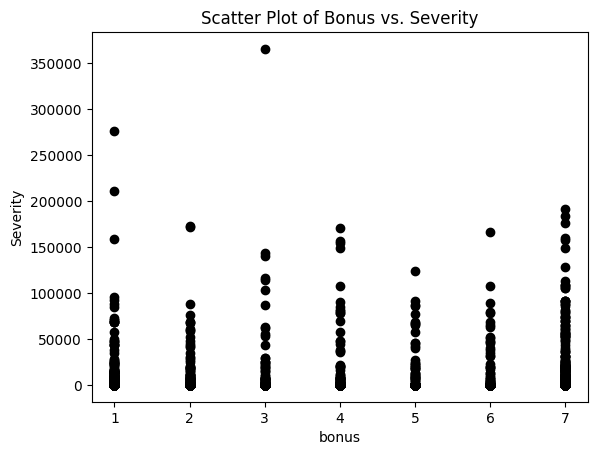

In [ ]:
#bonus
plt.scatter(data2['bonus'], data2['Severity'], color='black', marker='o')
plt.xlabel('bonus')
plt.ylabel('Severity')
plt.title('Scatter Plot of Bonus vs. Severity')

plt.show()

In [ ]:
data2

,Age,gender,zon,mcklass,Vec-age,bonus,duration,nbclaim,Severity,frequency
0,0,0,1,4,12,1,0.175342,0,0,0
1,4,0,3,6,9,1,0.000000,0,0,0
2,5,1,3,3,18,1,0.454795,0,0,0
3,5,1,4,1,25,1,0.172603,0,0,0
4,6,1,2,1,26,1,0.180822,0,0,0
...,...,...,...,...,...,...,...,...,...,...
64543,86,0,4,5,16,3,0.413699,0,0,0
64544,86,0,4,6,9,7,1.057534,0,0,0
64545,87,0,4,6,10,7,0.323288,0,0,0
64546,91,0,1,5,17,1,0.000000,0,0,0


In [ ]:
data2['Severity'] = data2['Severity'].astype(int)

In [ ]:
Xs = data2.drop(['duration', 'nbclaim', 'frequency'],axis=1)
ys = data2['Severity']

Data duration dan nbclaim tidak akan digunakan dalam pemodelan severity, sehingga akan dihilangkan dan dataframe yang terbentuk akan diberikan sebagai label 'Xs', sedangkan ys sebagai label dari data severity

In [ ]:
Xs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64548 entries, 0 to 64547
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Age       64548 non-null  int64
 1   gender    64548 non-null  int64
 2   zon       64548 non-null  int64
 3   mcklass   64548 non-null  int64
 4   Vec-age   64548 non-null  int64
 5   bonus     64548 non-null  int64
 6   Severity  64548 non-null  int64
dtypes: int64(7)
memory usage: 3.4 MB


type dari Xs

Sama seperti yang terdapat pada pemodelan frequency, proses pemilihan proses training & testing akan menggunakan proporsi yang paling bersesuaian dengan nilai MSE & RMSE yang terkecil

### a) 90% Training

In [ ]:
Xs_train, Xs_test, ys_train, ys_test = ms.train_test_split(Xs,ys,test_size=0.1, random_state = seed)
Xs_train.count()

Age         58093
gender      58093
zon         58093
mcklass     58093
Vec-age     58093
bonus       58093
Severity    58093
dtype: int64

Terdapat 58093 data pada 90% training

**Normalisasi**

In [ ]:
scl = pp.StandardScaler(copy=True, with_mean=True, with_std=True)
scl.fit(Xs_train)
Xs_train=scl.transform(Xs_train)
Xs_test=scl.transform(Xs_test)

In [ ]:
print(Xs_train.min())
print(Xs_train.max())

-3.270869453122334
75.73556861041345


Tampak nilai jangkauan sudah lumayan kecil

In [ ]:
#identity
mlpsa = ann.MLPClassifier(hidden_layer_sizes=(1, ), max_iter=5, activation = 'identity', solver = "adam", random_state = seed)
mlpsa.fit(Xs_train, ys_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='identity', hidden_layer_sizes=(1,), max_iter=5,
              random_state=42)

Sama halnya dengan frequency, fungsi aktivasi yang digunakan adalah relu, tanh, logistic, dan identity

In [ ]:
ysa_prediksi = mlpsa.predict(Xs_test)

In [ ]:
print(met.classification_report(ys_test,ya_prediksi))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6391
           2       0.00      0.00      0.00         0
         408       0.00      0.00      0.00         1
         456       0.00      0.00      0.00         1
         646       0.00      0.00      0.00         1
         650       0.00      0.00      0.00         2
         662       0.00      0.00      0.00         1
        1000       0.00      0.00      0.00         1
        1047       0.00      0.00      0.00         1
        1100       0.00      0.00      0.00         1
        1339       0.00      0.00      0.00         1
        2037       0.00      0.00      0.00         1
        2450       0.00      0.00      0.00         1
        2652       0.00      0.00      0.00         1
        3500       0.00      0.00      0.00         1
        3787       0.00      0.00      0.00         1
        3862       0.00      0.00      0.00         1
        3875       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Tampak bahwa nilai weighted average sudah > 90%, akan tetapi nilai macro average masih sangat kecil, ini juga sama halnya dengan pemodelan frequency, dimana terdapat nilai '0' yang banyak

In [ ]:
msesa = sklearn.metrics.mean_squared_error(ys_test, ysa_prediksi)
rmsesa = math.sqrt(msesa)
print(f"MSE menggunakan fungsi aktivasi Identity dengan 90% training adalah {msesa}")
print(f"RMSE menggunakan fungsi aktivasi Identity dengan 90% training adalah {rmsesa}")

MSE menggunakan fungsi aktivasi Identity dengan 90% training adalah 8840291.402478699
RMSE menggunakan fungsi aktivasi Identity dengan 90% training adalah 2973.2627536897407


### b) 95% Training

In [ ]:
Xs1_train, Xs1_test, ys1_train, ys1_test = ms.train_test_split(Xs,ys,test_size=0.05, random_state = seed)
Xs1_train.count()

Age         61320
gender      61320
zon         61320
mcklass     61320
Vec-age     61320
bonus       61320
Severity    61320
dtype: int64

Terdapat 61320 data untuk 95% training

**Normalisasi**

In [ ]:
scl = pp.StandardScaler(copy=True, with_mean=True, with_std=True)
scl.fit(Xs1_train)
Xs1_train=scl.transform(Xs1_train)
Xs1_test=scl.transform(Xs1_test)

In [ ]:
print(Xs1_train.min())
print(Xs1_train.max())

-3.269117448534325
76.27394412005113


tampak bahwa nilai jangkauan sudah lumayan kecil

In [ ]:
#identity
mlpsb = ann.MLPClassifier(hidden_layer_sizes=(1, ), max_iter=5, activation = 'identity', solver = "adam", random_state = seed)
mlpsb.fit(Xs1_train, ys1_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='identity', hidden_layer_sizes=(1,), max_iter=5,
              random_state=42)

In [ ]:
ysb_prediksi = mlpsb.predict(Xs1_test)

In [ ]:
print(met.classification_report(ys1_test,ysb_prediksi))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3200
         408       0.00      0.00      0.00         1
         646       0.00      0.00      0.00         1
         650       0.00      0.00      0.00         1
        1000       0.00      0.00      0.00         1
        1047       0.00      0.00      0.00         1
        1339       0.00      0.00      0.00         1
        2450       0.00      0.00      0.00         1
        2652       0.00      0.00      0.00         1
        3500       0.00      0.00      0.00         1
        3862       0.00      0.00      0.00         1
        3875       0.00      0.00      0.00         1
        5047       0.00      0.00      0.00         1
        5565       0.00      0.00      0.00         1
        5752       0.00      0.00      0.00         1
        6212       0.00      0.00      0.00         1
        6385       0.00      0.00      0.00         1
        7000       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Tampak nilai weighted average model > 90%, akan tetapi nilai macro average masih sangat kecil

In [ ]:
msesb = sklearn.metrics.mean_squared_error(ys1_test, ysb_prediksi)
rmsesb = math.sqrt(msesb)
print(f"MSE menggunakan fungsi aktivasi Identity dengan 95% training adalah {msesb}")
print(f"RMSE menggunakan fungsi aktivasi Identity dengan 95% training adalah {rmsesb}")

MSE menggunakan fungsi aktivasi Identity dengan 95% training adalah 4077771.682156134
RMSE menggunakan fungsi aktivasi Identity dengan 95% training adalah 2019.3493214786129


### c) 99% Training

In [ ]:
Xs2_train, Xs2_test, ys2_train, ys2_test = ms.train_test_split(Xs,ys,test_size=0.01, random_state = seed)
Xs2_train.count()

Age         63902
gender      63902
zon         63902
mcklass     63902
Vec-age     63902
bonus       63902
Severity    63902
dtype: int64

Terdapat 63902 data untuk 99% training

**Normalisasi**

In [ ]:
scl = pp.StandardScaler(copy=True, with_mean=True, with_std=True)
scl.fit(Xs2_train)
Xs2_train=scl.transform(Xs2_train)
Xs2_test=scl.transform(Xs2_test)

In [ ]:
print(Xs2_train.min())
print(Xs2_train.max())

-3.2679417500400083
77.50615867395385


Tampak nilai jangkauan sudah lumayan kecil

In [ ]:
#identity
mlpsc = ann.MLPClassifier(hidden_layer_sizes=(1, ), max_iter=5, activation = 'identity', solver = "adam", random_state = seed)
mlpsc.fit(Xs2_train, ys2_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='identity', hidden_layer_sizes=(1,), max_iter=5,
              random_state=42)

In [ ]:
ysc_prediksi = mlpsc.predict(Xs2_test)

In [ ]:
print(met.classification_report(ys2_test,ysc_prediksi))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       633
         408       0.00      0.00      0.00         1
        1047       0.00      0.00      0.00         1
        2450       0.00      0.00      0.00         1
        3862       0.00      0.00      0.00         1
        5752       0.00      0.00      0.00         1
        6212       0.00      0.00      0.00         1
        6385       0.00      0.00      0.00         1
        8000       0.00      0.00      0.00         0
        8200       0.00      0.00      0.00         1
       10000       0.00      0.00      0.00         1
       11801       0.00      0.00      0.00         1
       11944       0.00      0.00      0.00         1
       30164       0.00      0.00      0.00         1
       57771       0.00      0.00      0.00         1

    accuracy                           0.98       646
   macro avg       0.07      0.07      0.07       646
weighted avg       0.97   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Nilai weighted average model > 90% dan nilai macro average masih kecil, akan tetapi sedikit lebih baik dibandingkan model-model severity sebelumnya

In [ ]:
msesc = sklearn.metrics.mean_squared_error(ys2_test, ysc_prediksi)
rmsesc = math.sqrt(msesc)
print(f"MSE menggunakan fungsi aktivasi Identity dengan 99% training adalah {msesc}")
print(f"RMSE menggunakan fungsi aktivasi Identity dengan 99% training adalah {rmsesc}")

MSE menggunakan fungsi aktivasi Identity dengan 99% training adalah 4856131.5232198145
RMSE menggunakan fungsi aktivasi Identity dengan 99% training adalah 2203.663205487584


### Best Model Severity

In [ ]:
Sev_Selection = {
    'Model': ['90%', '95%', '99%'],
    'MSE': [msesa, msesb, msesc],
    'RMSE': [rmsesa, rmsesb, rmsesc]
}
pd.DataFrame(Sev_Selection)

,Model,MSE,RMSE
0,90%,8.840291e+06,2973.262754
1,95%,4.077772e+06,2019.349321
2,99%,4.856132e+06,2203.663205


Diperoleh Model 95% Training dengan fungsi aktivasi Identity merupakan model severity terbaik berdasarkan MSE & RMSE terkecil

In [ ]:
print(mlpsb.coefs_)

[array([[ 5.92450581e-03],
       [ 3.76093496e-03],
       [ 3.63904714e-03],
       [-5.96130490e-04],
       [ 1.23867872e-03],
       [-1.17060296e-03],
       [-2.06053253e+00]]), array([[ 1.42210922, -1.17553318, -1.19138947, -1.15871805, -1.13935631,
        -1.19079934, -1.19141337, -1.18872003, -1.1871538 , -1.18790065,
        -1.18832972, -1.17211319, -1.18660846, -1.18869473, -1.18342321,
        -1.18620173, -1.18925514, -1.1821561 , -1.18768591, -1.18430893,
        -1.1873916 , -1.19009922, -1.18642548, -1.18403506, -1.19082879,
        -1.16351749, -1.159546  , -1.17947876, -1.19128245, -1.19110839,
        -1.18390578, -1.19008693, -1.18445531, -1.18938093, -1.18539025,
        -1.16940622, -1.18454554, -1.18245849, -1.1912983 , -1.18451292,
        -1.18241539, -1.19040888, -1.14614442, -1.18330041, -1.16459345,
        -1.16194985, -1.18596904, -1.14938103, -1.18858708, -1.18816005,
        -1.18662423, -1.18563312, -1.19112831, -1.18893282, -1.17448052,
        -1.1

## Premium Calculation

Nilai premium dapat diperoleh dari hasil perkalian antara relativities frequency dan relativities severity. Nilai relativities merupakan nilai exponen dari bobot kedua unsur tersebut. Perhitungan dibawah ini merupakan hasil kali kedua relativities tersebut

In [ ]:
mlpsb.coefs_[0]

array([[ 5.92450581e-03],
       [ 3.76093496e-03],
       [ 3.63904714e-03],
       [-5.96130490e-04],
       [ 1.23867872e-03],
       [-1.17060296e-03],
       [-2.06053253e+00]])

In [ ]:
mlpb.coefs_[0]
freq = mlpb.coefs_[0]
print(mlpb.coefs_[0])

[[ 2.80908180e-03]
 [ 2.30290171e-03]
 [ 6.16383251e-03]
 [ 3.54081897e-04]
 [ 2.89594896e-03]
 [-3.28961722e-03]
 [-1.34165480e+00]]


Di atas ini merupakan koefisien untuk model frequency.

In [ ]:
print(f"Model frequency dinyatakan dalam relativities = exp({(freq[0,0])}Age) x exp({(freq[1,0])}Gender) x exp({(freq[2,0])}Zone) x exp({(freq[3,0])}Mcklass) x exp({(freq[4,0])}Vec-age) x exp({(freq[5,0])}Bonus) x {np.exp(freq[6,0])}")

Model frequency dinyatakan dalam relativities = exp(0.0028090818014111342Age) x exp(0.002302901711826106Gender) x exp(0.0061638325107053115Zone) x exp(0.00035408189741511473Mcklass) x exp(0.002895948959481751Vec-age) x exp(-0.003289617222478271Bonus) x 0.26141272345008587


In [ ]:
mlpsb.coefs_[0]
sev = mlpsb.coefs_[0]
print(mlpsb.coefs_[0])

[[ 5.92450581e-03]
 [ 3.76093496e-03]
 [ 3.63904714e-03]
 [-5.96130490e-04]
 [ 1.23867872e-03]
 [-1.17060296e-03]
 [-2.06053253e+00]]


Di atas ini merupakan koefisien untuk model severity

In [ ]:
print(f"Model severity dinyatakan dalam relativities = exp({(sev[0,0])}Age) x exp({(sev[1,0])}Gender) x exp({(sev[2,0])}Zone) x exp({(sev[3,0])}Mcklass) x exp({(sev[4,0])}Vec-age) x exp({(sev[5,0])}Bonus) x {np.exp(sev[6,0])}")

Model severity dinyatakan dalam relativities = exp(0.005924505810003773Age) x exp(0.003760934958794067Gender) x exp(0.003639047143408323Zone) x exp(-0.0005961304903003518Mcklass) x exp(0.0012386787212325008Vec-age) x exp(-0.0011706029644822766Bonus) x 0.1273861154552569


In [ ]:
premium = (mlpb.coefs_[0]) + (mlpsb.coefs_[0])
print(premium)

[[ 8.73358761e-03]
 [ 6.06383667e-03]
 [ 9.80287965e-03]
 [-2.42048593e-04]
 [ 4.13462768e-03]
 [-4.46022019e-03]
 [-3.40218733e+00]]


In [ ]:
np.exp(premium[0,0] * 30) * np.exp(premium[1,0] * 0) * np.exp(premium[2,0] * 2) * np.exp(premium[3,0] * 5) * np.exp(premium[4,0] * 6) * np.exp(premium[5,0] * 7) * np.exp(premium[6,0])

0.043796649458310216

Maka, kasus untuk seorang pria berusia 30 tahun yang ingin mengasuransikan mobilnya yang berusia 6 tahun dengan zone: 2, class type: 5, dan bonus: 7 adalah 0.044 yang dimana berbeda jauh dengan perhitungan menggunakan GLM, yakni sekitar 317.45. Perbedaan yang jauh tersebut terlatak pada pemodelan frequency dan severity ANN yang tidak berdasarkan distribusi dan terlalu banyak nilai 0.

###ANN Premium

In [ ]:
data2['Premium'] = np.nan

In [ ]:
for i in range (len(data2['Age'])):
  (data2['Premium'])[i] = np.exp(7.19125219e-03 * (data2['Age'])[i]) * np.exp(3.11177113e-03 * (data2['gender'])[i]) * np.exp(4.57585985e-03 * (data2['zon'])[i]) * np.exp(-6.23931735e-04 * (data2['mcklass'])[i]) * np.exp(2.42978136e-03 * (data2['Vec-age'])[i]) * np.exp(-6.36090953e-03 * (data2['bonus'])[i]) * np.exp(-3.49566891e+00)

<ipython-input-325-7954830e3f37>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  (data2['Premium'])[i] = np.exp(7.19125219e-03 * (data2['Age'])[i]) * np.exp(3.11177113e-03 * (data2['gender'])[i]) * np.exp(4.57585985e-03 * (data2['zon'])[i]) * np.exp(-6.23931735e-04 * (data2['mcklass'])[i]) * np.exp(2.42978136e-03 * (data2['Vec-age'])[i]) * np.exp(-6.36090953e-03 * (data2['bonus'])[i]) * np.exp(-3.49566891e+00)


In [ ]:
data2.describe()

,Age,gender,zon,mcklass,Vec-age,bonus,duration,nbclaim,Severity,frequency,Premium
count,64548.000000,64548.000000,64548.000000,64548.000000,64548.000000,64548.000000,64548.000000,64548.000000,64548.000000,64548.000000,64548.000000
mean,42.416062,0.152646,3.213113,3.700053,12.540063,4.024571,1.010671,0.010798,264.017785,0.027003,0.042084
std,12.980960,0.359649,1.354591,1.523921,9.727445,2.364742,1.307424,0.107323,4694.693604,0.931791,0.004146
min,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.031092
25%,31.000000,0.000000,2.000000,3.000000,5.000000,2.000000,0.463014,0.000000,0.000000,0.000000,0.038551
50%,44.000000,0.000000,3.000000,4.000000,12.000000,4.000000,0.827397,0.000000,0.000000,0.000000,0.042250
75%,52.000000,0.000000,4.000000,5.000000,16.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.044837
max,92.000000,1.000000,7.000000,7.000000,99.000000,7.000000,31.339730,2.000000,365347.000000,183.000000,0.065567


In [ ]:
#Age
plt.scatter(data2['Age'], data2['Premium'], color='black', marker='o')
plt.xlabel('Age')
plt.ylabel('Premium')
plt.title('Scatter Plot of Age vs. Premium')

plt.show()

NameError: ignored

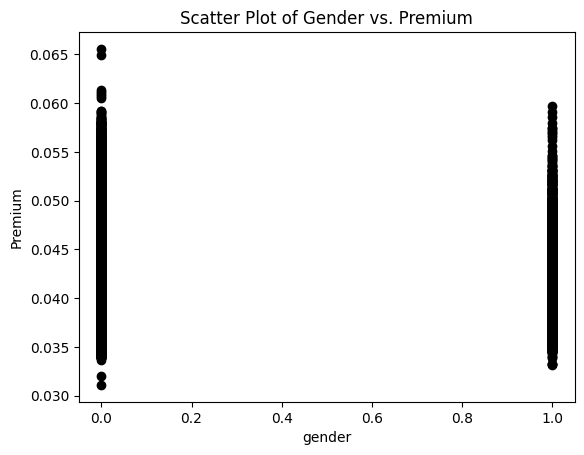

In [ ]:
#gender
plt.scatter(data2['gender'], data2['Premium'], color='black', marker='o')
plt.xlabel('gender')
plt.ylabel('Premium')
plt.title('Scatter Plot of Gender vs. Premium')

plt.show()

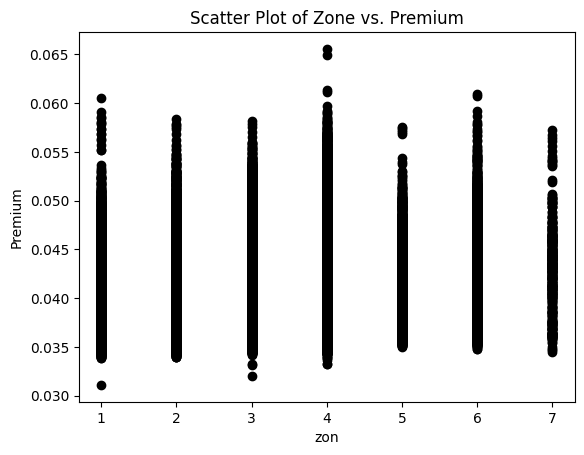

In [ ]:
#zone
plt.scatter(data2['zon'], data2['Premium'], color='black', marker='o')
plt.xlabel('zon')
plt.ylabel('Premium')
plt.title('Scatter Plot of Zone vs. Premium')

plt.show()

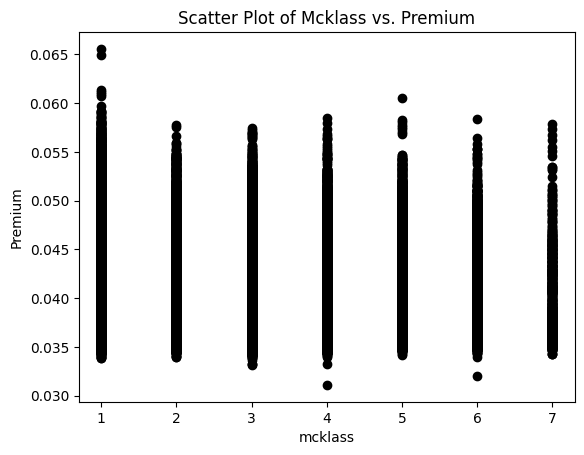

In [ ]:
#mcklass
plt.scatter(data2['mcklass'], data2['Premium'], color='black', marker='o')
plt.xlabel('mcklass')
plt.ylabel('Premium')
plt.title('Scatter Plot of Mcklass vs. Premium')

plt.show()

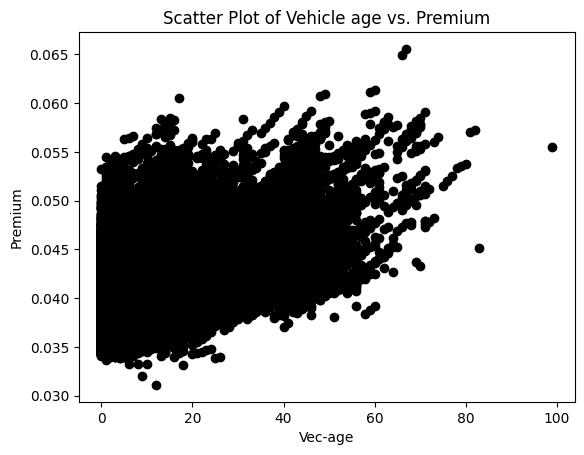

In [ ]:
#vec-age
plt.scatter(data2['Vec-age'], data2['Premium'], color='black', marker='o')
plt.xlabel('Vec-age')
plt.ylabel('Premium')
plt.title('Scatter Plot of Vehicle age vs. Premium')

plt.show()

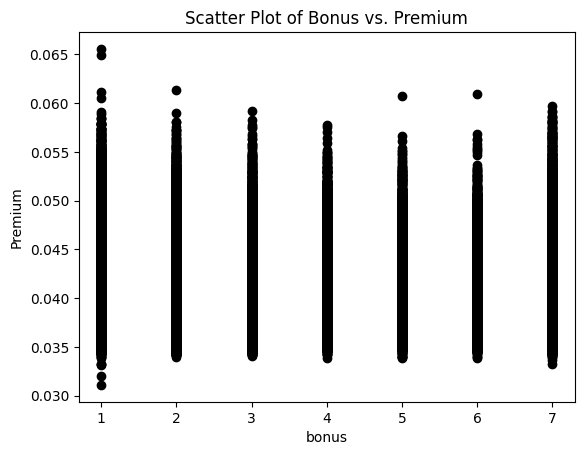

In [ ]:
#bonus
plt.scatter(data2['bonus'], data2['Premium'], color='black', marker='o')
plt.xlabel('bonus')
plt.ylabel('Premium')
plt.title('Scatter Plot of Bonus vs. Premium')

plt.show()

# GLM Premium Plot

Perhitungan premi dengan metode GLM mengklasifikasikan premi ke dalam beberapa rating factor, sehingga bentuknya tidak kontinu atau numerik.

In [ ]:
glm = pd.read_excel('/content/drive/Shareddrives/Analitika Data Project/glm premium.xlsx')
glm

,Age,Gender,Zone,MC_Class,Vehicle_Age,Bonus,Pure Premium
0,0:26,L,1,4,11:13,1,270.372328
1,0:26,L,3,6,7:10,1,626.544624
2,0:26,P,3,3,17:19,1,52.236945
3,0:26,P,4,1,20:99,1,130.349591
4,0:26,P,2,1,20:99,1,454.205619
...,...,...,...,...,...,...,...
64543,57:99,L,4,5,14:16,3,6.714034
64544,57:99,L,4,6,7:10,7,48.569220
64545,57:99,L,4,6,7:10,7,48.569220
64546,57:99,L,1,5,17:19,1,39.719411


Banyaknya data untuk setiap kategori

In [ ]:
print("Berdasarkan Age:")
print(glm['Age'].value_counts().sort_index().to_string())

print("Berdasarkan Gender:")
print(glm['Gender'].value_counts().sort_index().to_string())

print("Berdasarkan Zone:")
print(glm['Zone'].value_counts().sort_index().to_string())

print("Berdasarkan MC_Class:")
print(glm['MC_Class'].value_counts().sort_index().to_string())

print("Berdasarkan Vehicle_Age:")
print(glm['Vehicle_Age'].value_counts().sort_index().to_string())

print("Berdasarkan Bonus:")
print(glm['Bonus'].value_counts().sort_index().to_string())

Berdasarkan Age:
0:26      9672
27:33     9544
34:41     8442
42:46    10210
47:51     9918
52:56     7874
57:99     8888
Berdasarkan Gender:
L    54695
P     9853
Berdasarkan Zone:
1     8582
2    11794
3    12722
4    24816
5     2377
6     3884
7      373
Berdasarkan MC_Class:
1     7032
2     5204
3    18905
4    12378
5    11816
6     8407
7      806
Berdasarkan Vehicle_Age:
0:3      11293
11:13     8770
14:16    11657
17:19     7238
20:99     8793
4:6       8065
7:10      8732
Berdasarkan Bonus:
1    14498
2     8926
3     6726
4     5995
5     5101
6     5349
7    17953


## Visualisasi

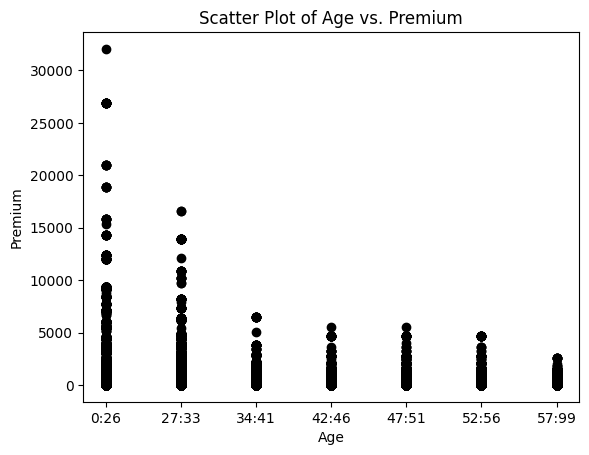

In [ ]:
#Age
plt.scatter(glm['Age'], glm['Pure Premium'], color='black', marker='o')
plt.xlabel('Age')
plt.ylabel('Premium')
plt.title('Scatter Plot of Age vs. Premium')

plt.show()

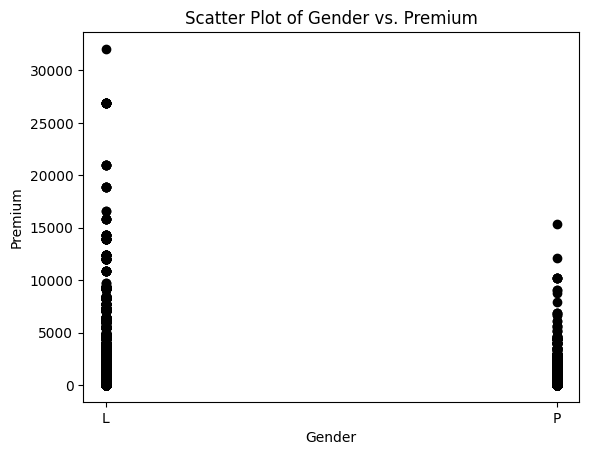

In [ ]:
#Gender
plt.scatter(glm['Gender'], glm['Pure Premium'], color='black', marker='o')
plt.xlabel('Gender')
plt.ylabel('Premium')
plt.title('Scatter Plot of Gender vs. Premium')

plt.show()

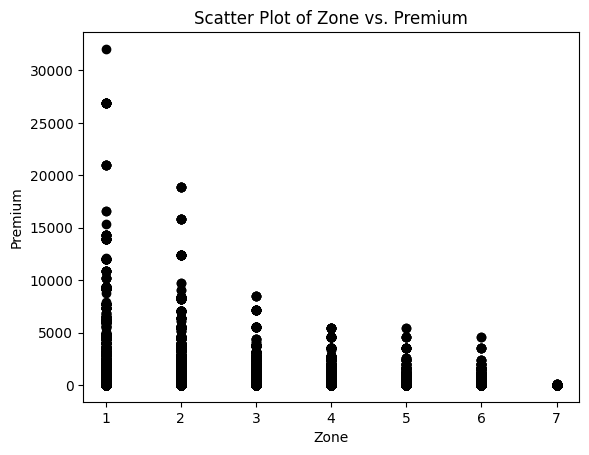

In [ ]:
#Zone
plt.scatter(glm['Zone'], glm['Pure Premium'], color='black', marker='o')
plt.xlabel('Zone')
plt.ylabel('Premium')
plt.title('Scatter Plot of Zone vs. Premium')

plt.show()

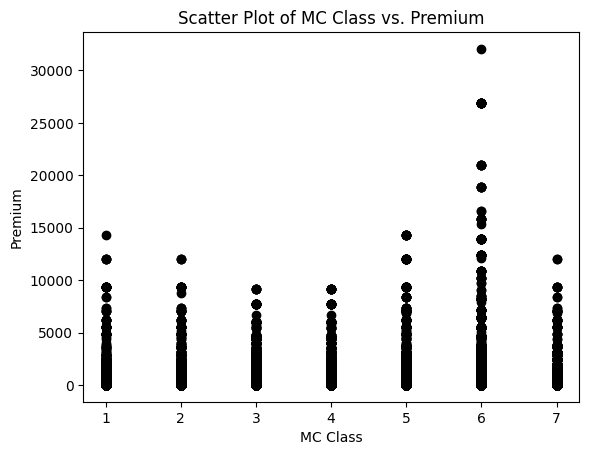

In [ ]:
#MC Class
plt.scatter(glm['MC_Class'], glm['Pure Premium'], color='black', marker='o')
plt.xlabel('MC Class')
plt.ylabel('Premium')
plt.title('Scatter Plot of MC Class vs. Premium')

plt.show()

In [ ]:
glm1 = glm

# Fungsi untuk mengubah format nama cell
def format_vehicle_age(cell):
    start, end = map(int, cell.split(':'))
    return f'{start:02d}:{end:02d}'

# Menggunakan apply untuk menerapkan fungsi pada kolom Vehicle_Age
glm1['Vehicle_Age'] = glm['Vehicle_Age'].apply(format_vehicle_age)

# Menampilkan DataFrame setelah perubahan
print(glm1)


         Age Gender  Zone  MC_Class Vehicle_Age  Bonus  Pure Premium
0       0:26      L     1         4       11:13      1    270.372328
1       0:26      L     3         6       07:10      1    626.544624
2       0:26      P     3         3       17:19      1     52.236945
3       0:26      P     4         1       20:99      1    130.349591
4       0:26      P     2         1       20:99      1    454.205619
...      ...    ...   ...       ...         ...    ...           ...
64543  57:99      L     4         5       14:16      3      6.714034
64544  57:99      L     4         6       07:10      7     48.569220
64545  57:99      L     4         6       07:10      7     48.569220
64546  57:99      L     1         5       17:19      1     39.719411
64547  57:99      L     2         6       11:13      7     67.425279

[64548 rows x 7 columns]


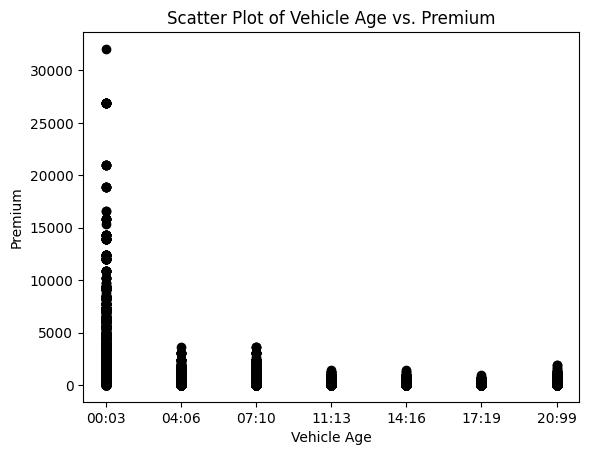

In [ ]:
# Sort DataFrame berdasarkan 'Vehicle_Age'
sorted_df = glm1.sort_values(by='Vehicle_Age')

# Scatter plot setelah DataFrame diurutkan
plt.scatter(sorted_df['Vehicle_Age'], sorted_df['Pure Premium'], color='black', marker='o')
plt.xlabel('Vehicle Age')
plt.ylabel('Premium')
plt.title('Scatter Plot of Vehicle Age vs. Premium')

plt.show()

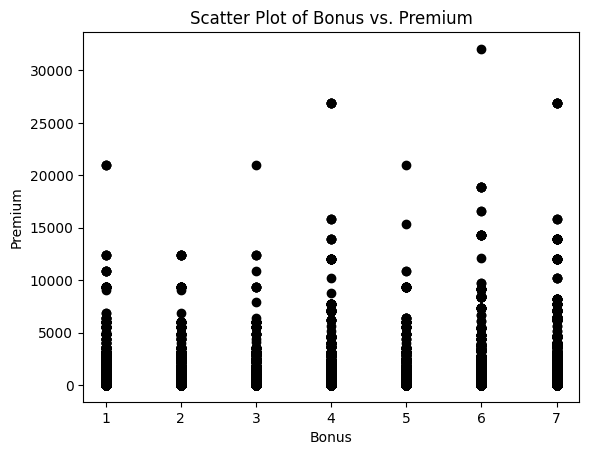

In [ ]:
#Bonus
plt.scatter(glm['Bonus'], glm['Pure Premium'], color='black', marker='o')
plt.xlabel('Bonus')
plt.ylabel('Premium')
plt.title('Scatter Plot of Bonus vs. Premium')

plt.show()